In [12]:
!pip install reportlab

import os
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet

data = [
    ["AccidentID", "Location", "Weather", "Road_Condition", "Time_of_Day", "Severity"],
    [1, "City Center", "Rainy", "Wet", "Night", "High"],
    [2, "Highway 12", "Clear", "Dry", "Morning", "Medium"],
    [3, "Bridge Road", "Foggy", "Wet", "Evening", "High"],
    [4, "Market Street", "Sunny", "Dry", "Afternoon", "Low"],
    [5, "Airport Road", "Rainy", "Wet", "Night", "Medium"],
]

pdf_path = "/mnt/data/accident_dataset.pdf"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(pdf_path), exist_ok=True)

doc = SimpleDocTemplate(pdf_path, pagesize=letter)
styles = getSampleStyleSheet()
table = Table(data)
table.setStyle(TableStyle([
    ("BACKGROUND", (0,0), (-1,0), colors.grey),
    ("TEXTCOLOR", (0,0), (-1,0), colors.whitesmoke),
    ("ALIGN", (0,0), (-1,-1), "CENTER"),
    ("GRID", (0,0), (-1,-1), 1, colors.black),
]))
doc.build([Paragraph("Sample Accident Dataset", styles["Title"]), table])

pdf_path

'/mnt/data/accident_dataset.pdf'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the list of lists into a pandas DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

# Display the first few rows of the DataFrame to verify
display(df.head())

,AccidentID,Location,Weather,Road_Condition,Time_of_Day,Severity
0,1,City Center,Rainy,Wet,Night,High
1,2,Highway 12,Clear,Dry,Morning,Medium
2,3,Bridge Road,Foggy,Wet,Evening,High
3,4,Market Street,Sunny,Dry,Afternoon,Low
4,5,Airport Road,Rainy,Wet,Night,Medium


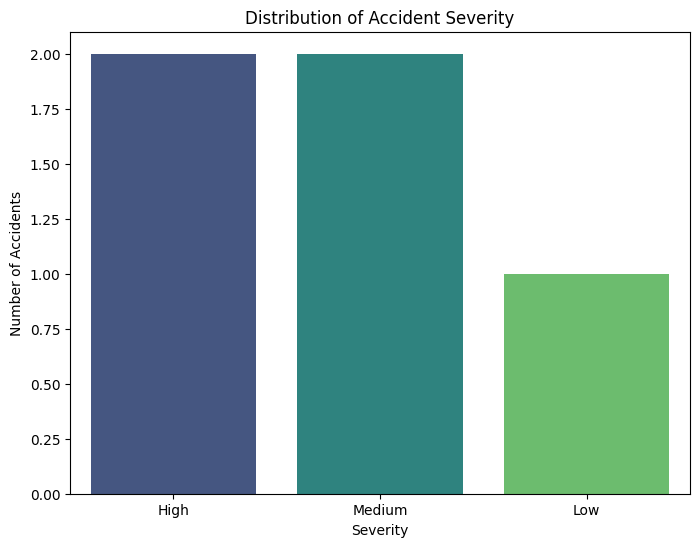

In [10]:
# Visualize the distribution of accident severity
plt.figure(figsize=(8, 6))
sns.countplot(x='Severity', data=df, palette='viridis', hue='Severity', legend=False)
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()

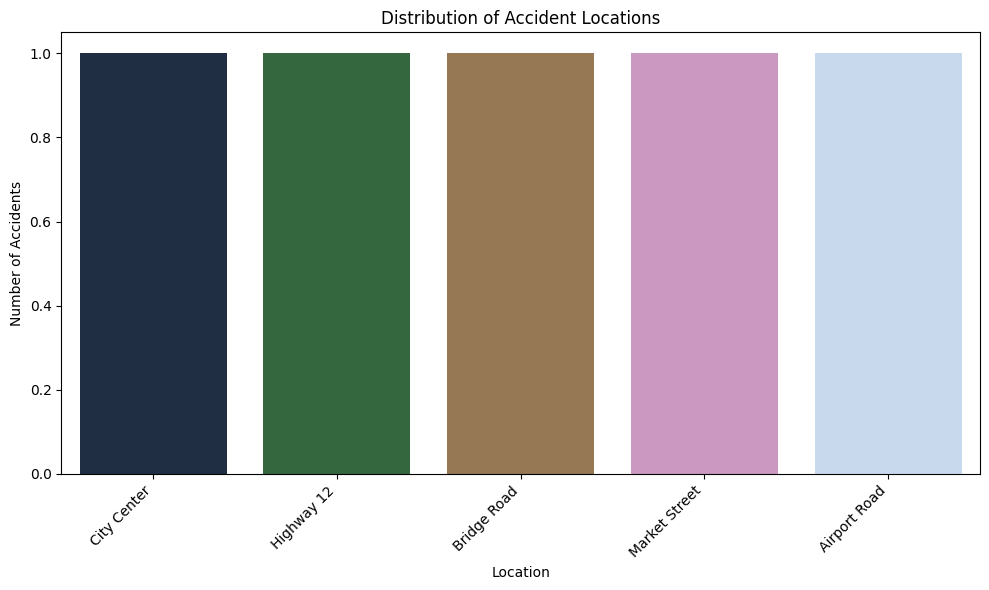

In [11]:
# Visualize the distribution of accident locations
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', data=df, palette='cubehelix', hue='Location', legend=False)
plt.title('Distribution of Accident Locations')
plt.xlabel('Location')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()